In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import geopandas
import geodatasets
import plotly.express as px
px.set_mapbox_access_token(open(".mapbox_token").read())
import plotly.io as pio
pio.renderers.default = "notebook"

# Exploratory Data Analysis

## Loading Data

In [2]:
trips = []
for i in range(1, 42):
    trips.append(pd.read_pickle(f'data/trips_combined/{i}.pkl'))
combined_trips = pd.concat(trips)
combined_trips

,duration,started_at,ended_at,start_station_id_old,start_station_name,start_lat,start_lng,end_station_id_old,end_station_name,end_lat,...,bikeid,usertype,birth year,gender,postal code,ride_id,rideable_type,start_station_id_new,end_station_id_new,member_casual
0,542,2015-01-01 00:21:44,2015-01-01 00:30:47,115.0,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,...,277.0,member,1984,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,438,2015-01-01 00:27:03,2015-01-01 00:34:21,80.0,MIT Stata Center at Vassar St / Main St,42.361962,-71.092053,95,Cambridge St - at Columbia St / Webster Ave,42.372969,...,648.0,member,1985,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,254,2015-01-01 00:31:31,2015-01-01 00:35:46,91.0,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,68,Central Square at Mass Ave / Essex St,42.36507,...,555.0,member,1974,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,432,2015-01-01 00:53:46,2015-01-01 01:00:58,115.0,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,...,1307.0,member,1987,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,735,2015-01-01 01:07:06,2015-01-01 01:19:21,105.0,Lower Cambridgeport at Magazine St/Riverside Rd,42.356954,-71.113687,88,Inman Square at Vellucci Plaza / Hampshire St,42.374035,...,177.0,casual,1986,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20389103,1926,2024-01-13 12:10:36,2024-01-13 12:42:42,NaN,Newmarket Square T Stop - Massachusetts Ave at...,42.326599,-71.066498,NaN,Somerville City Hall Annex,42.391898,...,NaN,NaN,NaN,NaN,NaN,C77DAA204E19EF6A,classic_bike,C32022,S32036,member
20389104,2214,2024-01-27 12:08:39,2024-01-27 12:45:33,NaN,Newmarket Square T Stop - Massachusetts Ave at...,42.326599,-71.066498,NaN,Somerville City Hall Annex,42.391898,...,NaN,NaN,NaN,NaN,NaN,77BC9B9BCAD3EBA6,classic_bike,C32022,S32036,member
20389105,457,2024-01-23 19:13:05,2024-01-23 19:20:42,NaN,Aquarium T Stop - 200 Atlantic Ave,42.360479,-71.050593,NaN,Main St at Thompson Sq,42.374878,...,NaN,NaN,NaN,NaN,NaN,C24A84547C47B792,electric_bike,B32004,D32038,member
20389106,1818,2024-01-11 16:41:42,2024-01-11 17:12:00,NaN,55 Wheeler Street,42.390821,-71.143946,NaN,Somerville City Hall Annex,42.391898,...,NaN,NaN,NaN,NaN,NaN,179B600DC22C66D7,classic_bike,M32088,S32036,member


## Trips with Same Start and End Station

In [3]:
same_start_and_end = combined_trips.loc[combined_trips['start_station_name'] == combined_trips['end_station_name']]
same_start_and_end
# check missingness, differences between station ID and name

,duration,started_at,ended_at,start_station_id_old,start_station_name,start_lat,start_lng,end_station_id_old,end_station_name,end_lat,...,bikeid,usertype,birth year,gender,postal code,ride_id,rideable_type,start_station_id_new,end_station_id_new,member_casual
20,1747,2015-01-01 10:53:43,2015-01-01 11:22:51,73.0,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,73,Harvard Square at Brattle St / Eliot St,42.373231,...,784.0,member,\N,0.0,NaN,NaN,NaN,NaN,NaN,NaN
32,603,2015-01-01 12:27:30,2015-01-01 12:37:34,68.0,Central Square at Mass Ave / Essex St,42.365070,-71.103100,68,Central Square at Mass Ave / Essex St,42.36507,...,876.0,casual,1987,2.0,NaN,NaN,NaN,NaN,NaN,NaN
48,1232,2015-01-01 13:41:06,2015-01-01 14:01:38,143.0,EF - North Point Park,42.369885,-71.069957,143,EF - North Point Park,42.369885,...,656.0,member,1988,1.0,NaN,NaN,NaN,NaN,NaN,NaN
59,2140,2015-01-01 14:36:07,2015-01-01 15:11:48,97.0,Harvard University River Houses at DeWolfe St ...,42.369190,-71.117141,97,Harvard University River Houses at DeWolfe St ...,42.36919,...,488.0,member,\N,0.0,NaN,NaN,NaN,NaN,NaN,NaN
74,62,2015-01-01 15:15:00,2015-01-01 15:16:03,91.0,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,91,One Kendall Square at Hampshire St / Portland St,42.366277,...,956.0,casual,1954,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20388903,908,2024-01-05 12:08:40,2024-01-05 12:23:48,NaN,Broad Canal Way at Third Street,42.363045,-71.082871,NaN,Broad Canal Way at Third Street,42.363045,...,NaN,NaN,NaN,NaN,NaN,4A71CAA41D091CC9,classic_bike,M32082,M32082,member
20388904,950,2024-01-06 09:11:42,2024-01-06 09:27:32,NaN,Broad Canal Way at Third Street,42.363045,-71.082871,NaN,Broad Canal Way at Third Street,42.363045,...,NaN,NaN,NaN,NaN,NaN,A94687FBCC2A3FDD,classic_bike,M32082,M32082,member
20388906,328,2024-01-06 15:04:05,2024-01-06 15:09:33,NaN,Broad Canal Way at Third Street,42.363045,-71.082871,NaN,Broad Canal Way at Third Street,42.363045,...,NaN,NaN,NaN,NaN,NaN,8908995BEC30F531,classic_bike,M32082,M32082,member
20388908,4019,2024-01-06 14:43:53,2024-01-06 15:50:52,NaN,Summer St at Quincy St,42.383709,-71.099830,NaN,Summer St at Quincy St,42.383709,...,NaN,NaN,NaN,NaN,NaN,5ECA518E3BDBEAB0,classic_bike,S32052,S32052,member


What kinds of extreme values are there?

In [4]:
np.quantile(same_start_and_end['duration'], [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]) / 60

array([-1.66666667e+00,  2.50000000e+00,  9.20000000e+00,  1.61666667e+01,
        2.28000000e+01,  2.85833333e+01,  3.55333333e+01,  4.55333333e+01,
        6.22000000e+01,  9.15000000e+01,  1.50801467e+05])

In [5]:
same_start_and_end.sort_values(by='duration')

,duration,started_at,ended_at,start_station_id_old,start_station_name,start_lat,start_lng,end_station_id_old,end_station_name,end_lat,...,bikeid,usertype,birth year,gender,postal code,ride_id,rideable_type,start_station_id_new,end_station_id_new,member_casual
19887599,-100,2023-11-08 12:18:25.000,2023-11-08 12:16:45.000,NaN,Mass Ave at Albany St,42.361358,-71.096702,NaN,Mass Ave at Albany St,42.361358,...,NaN,NaN,NaN,NaN,NaN,83D0B6435723C87D,docked_bike,M32061,M32061,member
20101653,-27,2023-12-02 18:40:53.000,2023-12-02 18:40:26.000,NaN,Seaport Blvd at Sleeper St,42.353178,-71.048173,NaN,Seaport Blvd at Sleeper St,42.353178,...,NaN,NaN,NaN,NaN,NaN,D205DDA605C5931A,classic_bike,C32036,C32036,casual
19915066,-6,2023-11-13 10:15:28.000,2023-11-13 10:15:22.000,NaN,Galileo Galilei Way at Fulkerson St/Binney St,42.366420,-71.088541,NaN,Galileo Galilei Way at Fulkerson St/Binney St,42.36642,...,NaN,NaN,NaN,NaN,NaN,8087B758A966B35B,docked_bike,M32078,M32078,member
20046947,-6,2023-11-29 23:53:11.000,2023-11-29 23:53:05.000,NaN,MIT Vassar St,42.355601,-71.103944,NaN,MIT Vassar St,42.355601,...,NaN,NaN,NaN,NaN,NaN,4E3BCBF10F51E2EB,docked_bike,M32042,M32042,member
20285762,-1,2024-01-16 17:44:50.000,2024-01-16 17:44:49.000,NaN,One Memorial Drive,42.361619,-71.080436,NaN,One Memorial Drive,42.361619,...,NaN,NaN,NaN,NaN,NaN,82EFA344FCDBF513,classic_bike,M32053,M32053,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000411,4705449,2019-08-30 19:27:30.694,2019-10-24 06:31:39.766,341.0,Roslindale Village - Washington St,42.286307,-71.128205,341,Roslindale Village - Washington St,42.286307,...,5422.0,casual,1989,2.0,NaN,NaN,NaN,NaN,NaN,NaN
6947835,5231466,2019-08-25 23:16:30.938,2019-10-25 12:27:37.281,339.0,Archdale Rd at Washington St,42.292666,-71.121195,339,Archdale Rd at Washington St,42.292666,...,4839.0,casual,1969,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4537607,5426307,2018-07-28 23:42:30.287,2018-09-29 19:00:57.843,205.0,Bowdoin St at Quincy St,42.307852,-71.065122,205,Bowdoin St at Quincy St,42.307852,...,395.0,casual,1969,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6336801,7113671,2019-06-28 14:09:51.639,2019-09-18 22:11:02.727,396.0,Wasgatt Playground,42.409330,-71.063819,396,Wasgatt Playground,42.40933,...,1150.0,casual,1984,1.0,NaN,NaN,NaN,NaN,NaN,NaN


see how this distribution differs for trips that start and end at different stations

In [6]:
different_start_and_end = combined_trips.loc[combined_trips['start_station_name'] != combined_trips['end_station_name']]
different_start_and_end

,duration,started_at,ended_at,start_station_id_old,start_station_name,start_lat,start_lng,end_station_id_old,end_station_name,end_lat,...,bikeid,usertype,birth year,gender,postal code,ride_id,rideable_type,start_station_id_new,end_station_id_new,member_casual
0,542,2015-01-01 00:21:44,2015-01-01 00:30:47,115.0,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,...,277.0,member,1984,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,438,2015-01-01 00:27:03,2015-01-01 00:34:21,80.0,MIT Stata Center at Vassar St / Main St,42.361962,-71.092053,95,Cambridge St - at Columbia St / Webster Ave,42.372969,...,648.0,member,1985,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,254,2015-01-01 00:31:31,2015-01-01 00:35:46,91.0,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,68,Central Square at Mass Ave / Essex St,42.36507,...,555.0,member,1974,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,432,2015-01-01 00:53:46,2015-01-01 01:00:58,115.0,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,...,1307.0,member,1987,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,735,2015-01-01 01:07:06,2015-01-01 01:19:21,105.0,Lower Cambridgeport at Magazine St/Riverside Rd,42.356954,-71.113687,88,Inman Square at Vellucci Plaza / Hampshire St,42.374035,...,177.0,casual,1986,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20389103,1926,2024-01-13 12:10:36,2024-01-13 12:42:42,NaN,Newmarket Square T Stop - Massachusetts Ave at...,42.326599,-71.066498,NaN,Somerville City Hall Annex,42.391898,...,NaN,NaN,NaN,NaN,NaN,C77DAA204E19EF6A,classic_bike,C32022,S32036,member
20389104,2214,2024-01-27 12:08:39,2024-01-27 12:45:33,NaN,Newmarket Square T Stop - Massachusetts Ave at...,42.326599,-71.066498,NaN,Somerville City Hall Annex,42.391898,...,NaN,NaN,NaN,NaN,NaN,77BC9B9BCAD3EBA6,classic_bike,C32022,S32036,member
20389105,457,2024-01-23 19:13:05,2024-01-23 19:20:42,NaN,Aquarium T Stop - 200 Atlantic Ave,42.360479,-71.050593,NaN,Main St at Thompson Sq,42.374878,...,NaN,NaN,NaN,NaN,NaN,C24A84547C47B792,electric_bike,B32004,D32038,member
20389106,1818,2024-01-11 16:41:42,2024-01-11 17:12:00,NaN,55 Wheeler Street,42.390821,-71.143946,NaN,Somerville City Hall Annex,42.391898,...,NaN,NaN,NaN,NaN,NaN,179B600DC22C66D7,classic_bike,M32088,S32036,member


In [7]:
def hist_between(df=same_start_and_end, lower=0, upper=3600, binsize=100, plot_vlines=True, show=True, alpha=1.0):
    df_trimmed = df.loc[(lower <= df['duration']) & (df['duration'] <= upper)]
    out = plt.hist(df_trimmed['duration'], bins=range(lower, upper + binsize, binsize), density=True, alpha=alpha, label='Same start and end station' if df.equals(same_start_and_end) else 'Different start and end stations')
    if plot_vlines:
        plt.vlines([1800, 2700], ymin=0, ymax=out[0].max(), color='black')
    if show:
        plt.show()

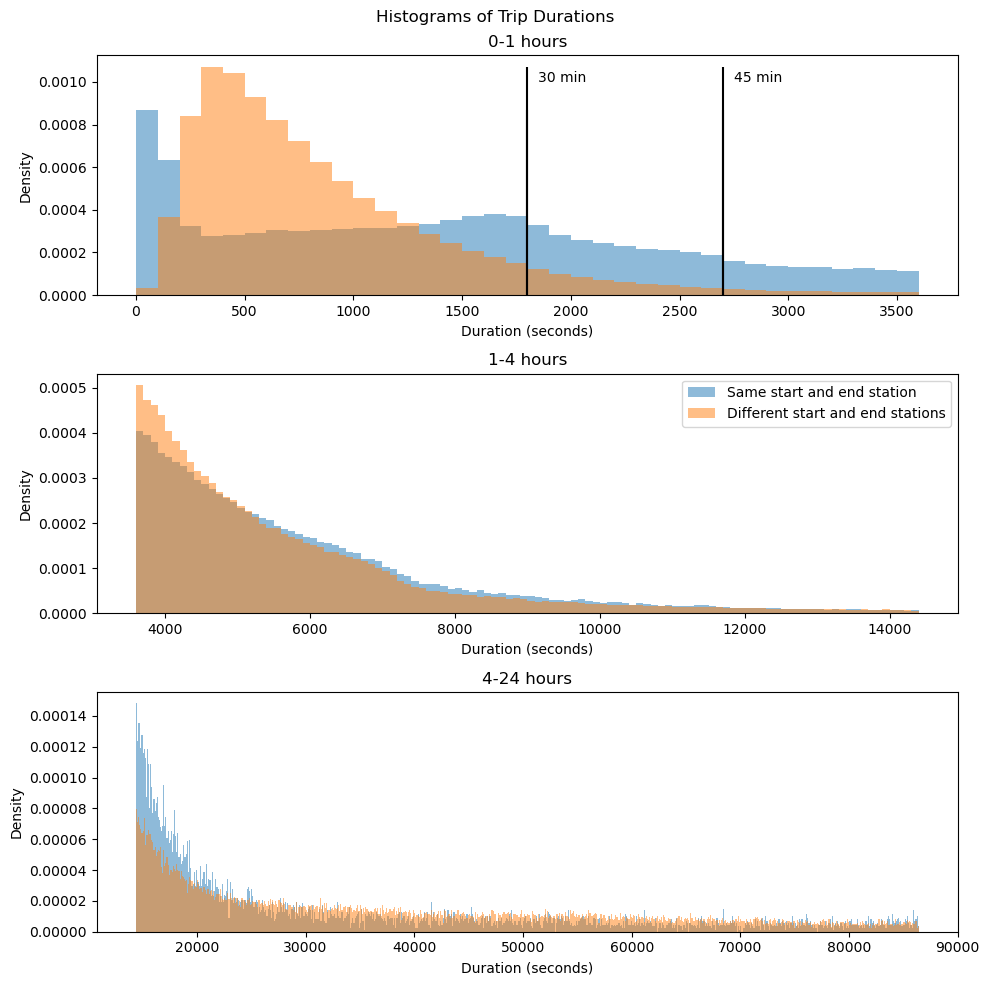

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs = axs.ravel()
plt.sca(axs[0])
hist_between(show=False, alpha=0.5)
hist_between(different_start_and_end, show=False, alpha=0.5)
plt.xlabel('Duration (seconds)')
plt.ylabel('Density')
plt.annotate('30 min', [1850, 0.001])
plt.annotate('45 min', [2750, 0.001])
plt.title('0-1 hours')

plt.sca(axs[1])
hist_between(lower=3600, upper=14400, plot_vlines=False, show=False, alpha=0.5)
hist_between(different_start_and_end, 3600, 14400, plot_vlines=False, show=False, alpha=0.5)
plt.xlabel('Duration (seconds)')
plt.ylabel('Density')
plt.legend()
plt.title('1-4 hours')

plt.sca(axs[2])
hist_between(lower=14400, upper=86400, plot_vlines=False, show=False, alpha=0.5)
hist_between(different_start_and_end, 14400, 86400, plot_vlines=False, show=False, alpha=0.5)
plt.xlabel('Duration (seconds)')
plt.ylabel('Density')
plt.title('4-24 hours')

plt.suptitle('Histograms of Trip Durations')
plt.tight_layout()
plt.show()

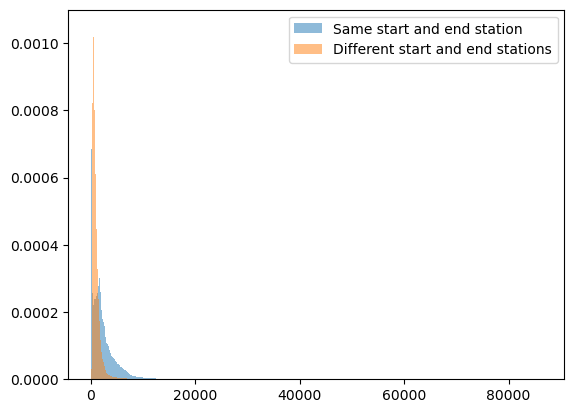

In [9]:
hist_between(upper=86400, plot_vlines=False, show=False, alpha=0.5)
hist_between(different_start_and_end, upper=86400, plot_vlines=False, show=False, alpha=0.5)
plt.legend()
plt.show()

In [10]:
same_start_and_end_trimmed = same_start_and_end.loc[(300 <= same_start_and_end['duration']) & (same_start_and_end['duration'] <= 28800)]

add up number of trips started at a station and number of trips ended at a station

trips starting and ending at the same station count twice

In [19]:
stations = pd.read_csv('data/raw/current_bluebikes_stations.csv', skiprows=1)
stations

,Number,Name,Latitude,Longitude,District,Public,Total docks
0,K32015,1200 Beacon St,42.344149,-71.114674,Brookline,Yes,15
1,W32006,160 Arsenal St,42.364664,-71.175694,Watertown,Yes,11
2,A32019,175 N Harvard St,42.364475,-71.128408,Boston,Yes,17
3,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19
4,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17
...,...,...,...,...,...,...,...
416,D32022,West End Park,42.365908,-71.064467,Boston,Yes,35
417,N32005,West Newton,42.349601,-71.226275,Newton,Yes,15
418,B32059,Whittier St Health Center,42.332863,-71.092189,Boston,Yes,19
419,D32040,Williams St at Washington St,42.306539,-71.107669,Boston,Yes,23


In [15]:
both_counts = same_start_and_end_trimmed['start_station_name'].value_counts()
start_only_counts = different_start_and_end['start_station_name'].value_counts()
end_only_counts = different_start_and_end['end_station_name'].value_counts()

In [39]:
stations['roundtrip_ratio'] = stations['Name'].apply(
    lambda n: 2 * both_counts[n] / (start_only_counts[n] + end_only_counts[n] + 2 * both_counts[n])
)
stations['trips'] = stations['Name'].apply(lambda n: start_only_counts[n] + end_only_counts[n] + 2 * both_counts[n])
stations['log_trips'] = np.log10(stations['trips'])
stations

,Number,Name,Latitude,Longitude,District,Public,Total docks,roundtrip_ratio,trips,log_trips
0,K32015,1200 Beacon St,42.344149,-71.114674,Brookline,Yes,15,0.029105,38344,4.583697
1,W32006,160 Arsenal St,42.364664,-71.175694,Watertown,Yes,11,0.068670,233,2.367356
2,A32019,175 N Harvard St,42.364475,-71.128408,Boston,Yes,17,0.041054,175088,5.243256
3,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19,0.024622,71886,4.856644
4,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17,0.329957,691,2.839478
...,...,...,...,...,...,...,...,...,...,...
416,D32022,West End Park,42.365908,-71.064467,Boston,Yes,35,0.015364,41526,4.618320
417,N32005,West Newton,42.349601,-71.226275,Newton,Yes,15,0.170509,1865,3.270679
418,B32059,Whittier St Health Center,42.332863,-71.092189,Boston,Yes,19,0.017747,12284,4.089340
419,D32040,Williams St at Washington St,42.306539,-71.107669,Boston,Yes,23,0.057739,33253,4.521831


In [45]:
fig = px.scatter_mapbox(stations, lat='Latitude', lon='Longitude',
                        size='roundtrip_ratio', color='log_trips',
                        hover_name='Name', hover_data=['trips'])
fig.show()